This notebook is to process and clean data form the social_media_usage.csv file. The file will be cleaned of any duplicates, inconsistent values, and outliers. In the case that the data is skewed, z score normalization will be applied. This is to reduce bias in the data. 

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# reading csv file 
df = pd.read_csv("social_media_usage.csv")
# storing duplicate values 
duplicates = df[df.duplicated()]
print(duplicates)
print(df.head())
# no duplicates in data 

Empty DataFrame
Columns: [User_ID, App, Daily_Minutes_Spent, Posts_Per_Day, Likes_Per_Day, Follows_Per_Day]
Index: []
  User_ID        App  Daily_Minutes_Spent  Posts_Per_Day  Likes_Per_Day  \
0     U_1  Pinterest                  288             16             94   
1     U_2   Facebook                  192             14            117   
2     U_3  Instagram                  351             13            120   
3     U_4     TikTok                   21             20            117   
4     U_5   LinkedIn                  241             16              9   

   Follows_Per_Day  
0                0  
1               15  
2               48  
3                8  
4               21  


In [11]:
# analyzing for inconsistent values, for example negative likes , follows, etc. 

inconsistent_values = [
    df[df['Daily_Minutes_Spent']<0],
    df[df['Likes_Per_Day']<0],
    df[df['Posts_Per_Day']<0],
    df[df['Follows_Per_Day']<0]
    ]
inconsistent_found = any(not df.empty for df in inconsistent_values)
if not inconsistent_found:
    print("no inconsistent values")
else: 
    print("inconsistent values")


no inconsistent values


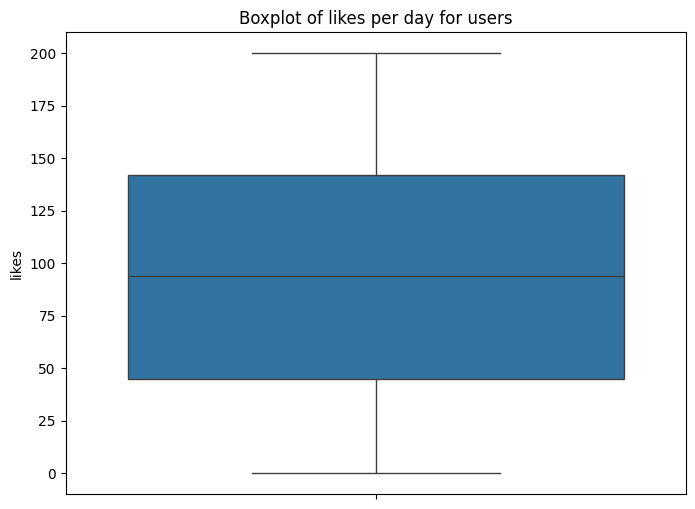

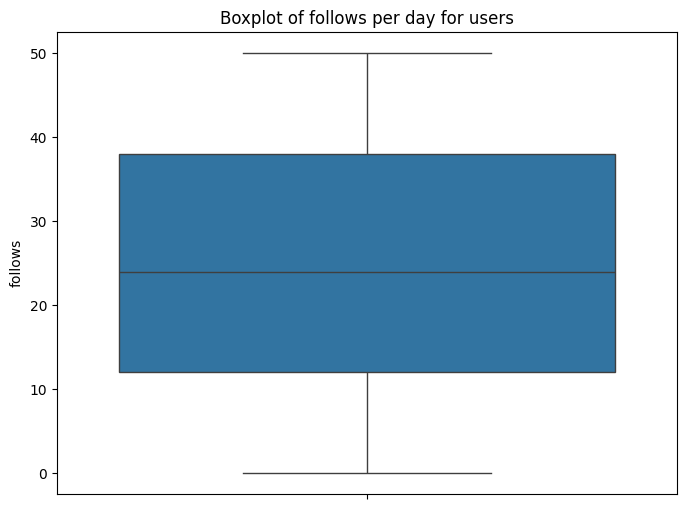

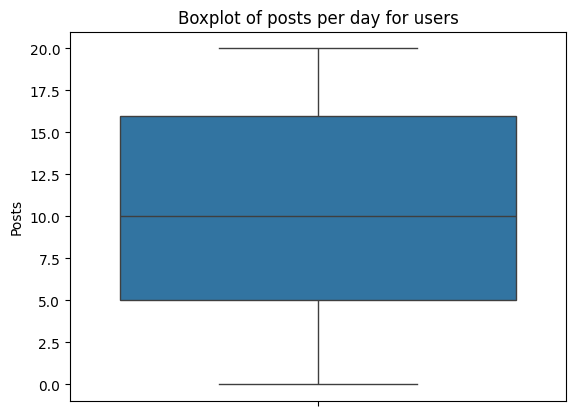

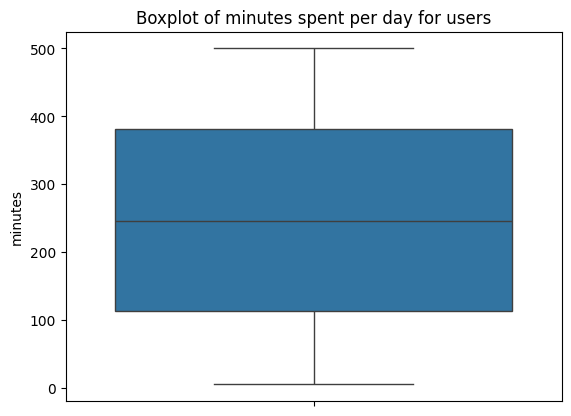

In [16]:
#checking for skewness in data and whether any outliers exist 
#df_likes = df[df["Likes_Per_Day"]]
#df_users = df[df["User_ID"]]
plt.figure(figsize= (8,6))
sns.boxplot(y =df["Likes_Per_Day"])
plt.title("Boxplot of likes per day for users")
plt.ylabel("Likes")
plt.show()
plt.figure(figsize = (8,6))
sns.boxplot(y =df["Follows_Per_Day"])
plt.title("Boxplot of follows per day for users")
plt.ylabel("Follows")
plt.show()
sns.boxplot(y =df["Posts_Per_Day"])
plt.title("Boxplot of posts per day for users")
plt.ylabel("Posts")
plt.show()
sns.boxplot(y =df["Daily_Minutes_Spent"])
plt.title("Boxplot of minutes spent per day for users")
plt.ylabel("Minutes")
plt.show() 
# based on the observance of the boxplots the data does not have any noticeable skewness
